<a href="https://colab.research.google.com/github/Abhinayy27/ML-Models/blob/main/skin_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import keras
from keras.applications import VGG19,Xception,VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from keras import layers
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data_gen = ImageDataGenerator(rescale = 1/255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    vertical_flip = True,
                                    horizontal_flip = True,
                                    rotation_range = 40,
                                    brightness_range = (0.5, 1.5),
                                    )
train_data = train_data_gen.flow_from_directory ('/content/drive/MyDrive/ML/Cancer dataset/train',
                                                 target_size = (64,64),
                                                class_mode = 'sparse',
                                                shuffle=True,seed=1
                                                )
test_data_gen = ImageDataGenerator(rescale = 1/255)
test_data = test_data_gen.flow_from_directory('/content/drive/MyDrive/ML/Cancer dataset/test',
                                                target_size = (64,64),
                                                class_mode = 'sparse',
                                                shuffle=True,seed=1
                                              )

Found 2637 images belonging to 2 classes.
Found 543 images belonging to 2 classes.


In [4]:
#display classes names
class_names = ["Benign","Malignant"]
for i in class_names :
    print(class_names.index(i),"  ",i)

0    Benign
1    Malignant


Benign


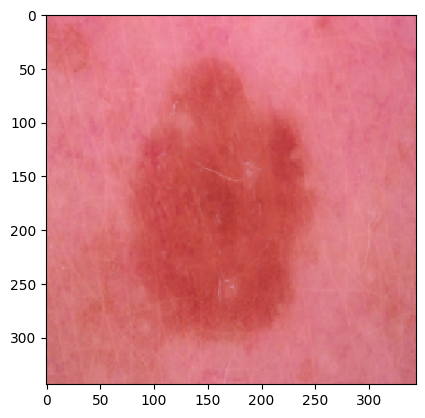

In [5]:
import keras.utils as image
image_path = '/content/drive/MyDrive/ML/Cancer dataset/test/benign/1042.jpg'
new_img = image.load_img(image_path, target_size=(344,344))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis = 0)
print("Benign")
plt.imshow(new_img)

Malignant


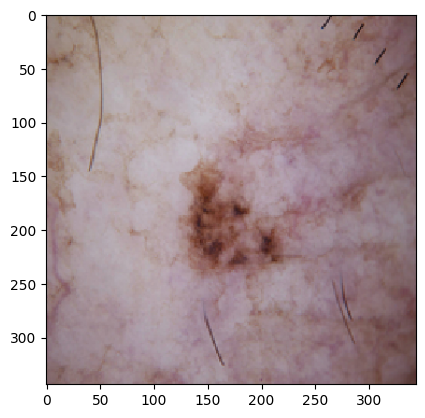

In [6]:
import keras.utils as image
image_path = '/content/drive/MyDrive/ML/Cancer dataset/test/malignant/1027.jpg'
new_img = image.load_img(image_path, target_size=(344,344))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis = 0)
print("Malignant")
plt.imshow(new_img)

In [7]:
## Building the CNN
cnn = tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(128, 3, activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(256, 3, activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(2, activation = 'softmax')
])

In [8]:
# Compile the CNN
cnn.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy' , metrics = ['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

In [9]:
history = cnn.fit( train_data,
                    validation_data = test_data,
                     callbacks = [early],
                     epochs = 1)

83/83 [==============================] - 791s 10s/step - loss: 0.5854 - accuracy: 0.6932 - val_loss: 0.5508 - val_accuracy: 0.7551


In [10]:
cnn.evaluate (test_data)

17/17 [==============================] - 4s 207ms/step - loss: 0.5508 - accuracy: 0.7551


[0.5507680773735046, 0.7550644278526306]

In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']
loss = histroy.history['loss']
val_loss = histroy.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

NameError: name 'histroy' is not defined

In [ ]:
image_path = '/content/drive/MyDrive/ML/Cancer dataset/test/benign/1173.jpg'
new_img = image.load_img(image_path, target_size = (244,244))
img  = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = cnn.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])



ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 1024, but received input with shape (None, 43264)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 244, 244, 3), dtype=float32)
      • training=False
      • mask=None


In [ ]:
image_path = '/content/drive/MyDrive/ML/Cancer dataset/train/benign/102.jpg'
new_img = image.load_img(image_path, target_size = (244,244))
img  = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = cnn.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])



1/1 [==============================] - 0s 112ms/step
[0]
Benign


In [ ]:
image_path = '/content/drive/MyDrive/ML/Cancer dataset/train/malignant/104.jpg'
new_img = image.load_img(image_path, target_size = (244,244))
img  = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = cnn.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])




1/1 [==============================] - 0s 246ms/step
[0]
Benign


In [ ]:
image_path == '/content/drive/MyDrive/ML/Cancer dataset/train/malignant/1032.jpg'
new_img = image.load_img(image_path, target_size = (244,244))
img  = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = cnn.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])



1/1 [==============================] - 0s 107ms/step
[0]
Benign
